<a href="https://colab.research.google.com/github/Srija17/ML-MINOR-APRIL/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet

     |████████████████████████████████| 8.2MB 7.5MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 4.2MB 39.8MB/s 
     |████████████████████████████████| 112kB 63.8MB/s 
     |████████████████████████████████| 174kB 45.3MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 122kB 65.0MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [ ]:
#Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import svm
import pickle
from pyngrok import ngrok
from PIL import Image

In [28]:
#Pre-processing
target = []
images = []
flat_data = []
datadir = '/content/drive/MyDrive/ML Smartknower/MinorProject'
categories = ['Badminton Racket','Shuttlecock']

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
      img_arr = imread(os.path.join(path,img))
      img_resized = resize(img_arr,(150,150,3))
      flat_data.append(img_resized.flatten())
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
unique, count = np.unique(target,return_counts=True)
print(unique)
print(count)
plt.grid()
plt.bar(categories,count)

<BarContainer object of 2 artists>

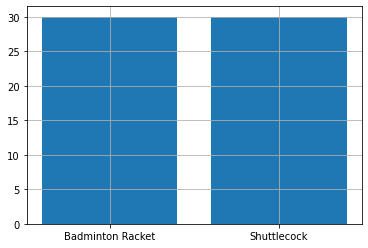

In [50]:
unique, count = np.unique(target,return_counts=True)
plt.grid()
plt.bar(categories,count)

In [30]:
#Data Spliting
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.2,random_state=120)

In [31]:
param_grid = [ {'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']} ]
svc = svm.SVC(probability = True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [33]:
y_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [37]:
 accuracy_score(y_pred,y_test)

1.0

In [35]:
confusion_matrix(y_pred,y_test)

array([[8, 0],
       [0, 4]])

In [38]:
pickle.dump(clf,open('ImageRecog.p','wb'))

In [39]:
model = pickle.load(open('ImageRecog.p','rb'))

Enter your URL:https://im01.itaiwantrade.com/fea1d9bb-a210-483d-ae56-1f8faaae7230/YONEX_MAVIS_350_%282%29.jpg
(497, 500, 3)
1
<class 'numpy.int64'>
PREDICTED OUTPUT IS:Shuttlecock


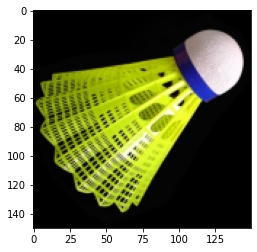

In [40]:
flat_data=[]
url=input("Enter your URL:")
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
print(y_out[0])
print(type(y_out[0]))
y_out=categories[y_out[0]]
print(f'PREDICTED OUTPUT IS:{y_out}')

In [53]:
%%writefile ImageClassifier.py
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title('Badminton Racket or Shuttlecock Detector Using Machine Learning')
st.text('Upload The Image For Prediction --> ')

model = pickle.load(open('ImageRecog.p','rb'))
uploaded_file = st.file_uploader("Choose an image --> ",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')
  if st.button('PREDICT'):
    categories = ['Badminton Racket','Shuttlecock']
    st.write('Result : ')
    flat_data = []
    img = np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    print(img.shape)
    plt.imshow(img_resized)
    y_out = model.predict(flat_data)
    y_out = [y_out[0]]
    st.title(f'PREDICTED OUTPUT IS : {categories[y_out[0]]}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(categories):
      st.write(f'{item} : {q[0][index]*100} %')

Overwriting ImageClassifier.py


In [ ]:
!nohup streamlit run ImageClassifier.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://07d114b02472.ngrok.io'